<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Комментарий ревьюера</b>


Привет, Гаврил! Давай знакомиться! Меня зовут Дмитрий Махортов, и я буду проверять твой проект. Сразу предлагаю общение на «ты» 🙂, но если тебе это не комфортно, то дай знать, и мы перейдем на «вы».


Моя основная цель — не указать на совершенные тобою ошибки, а поделиться своим опытом и помочь тебе погрузиться в увлекательный мир работы с данными и вырасти в крепкого профи. Это отдаленная цель. А ближайшая - сделать твою работу еще лучше )).
   
    
Все ключевые этапы в работе выполнены, и я вижу что с проектом ты справшяешься. Есть моменты, которые нужно доработать, но я уверен, у тебя все получится.
        
Расскажу как обычно проходит проверка:    
Бывают моменты, которые требуют пристального внимания. Комментарии по ним выделены <span style='background-color:#F7B3A4'> красным цветом </span> и обозначены значком 🛑. После их доработки проект будет принят.  🙂

<span style='background-color:#B7EBA7'> Зеленым цветом </span> и значком ✅ отмечены удачные и элегантные решения, на которые можно опираться в будущих проектах. Или советы «со звездочкой», которые помогут тебе в будущем.

<span style='background-color:#F9EDA6'>Жёлтым цветом </span> и значком ⚠️ выделено то, что в следующий раз можно сделать по-другому. Ты можешь учесть эти комментарии при выполнении будущих заданий или доработать проект сейчас (однако это не обязательно).

Давай работать над проектом в диалоге: **если ты что-то меняешь в проекте по моим рекомендациям — пиши об этом**. Выбери для своих комментариев какой-то заметный цвет, так мне будет легче отследить изменения. Пожалуйста, **не перемещай, не изменяй и не удаляй мои комментарии**. Всё это поможет выполнить повторную проверку твоего проекта оперативнее.
</div>

<div class="alert" style="background-color:#ead7f7;color:#8737bf">
    <font size="3"><b>образец комментария студента</b></font>
   
Можешь использовать этот комментарий. Просто удали этот текст и вместо него напиши свой 🙂

</div>

# Прекод

# Сборный проект-4

Вам поручено разработать демонстрационную версию поиска изображений по запросу.

Для демонстрационной версии нужно обучить модель, которая получит векторное представление изображения, векторное представление текста, а на выходе выдаст число от 0 до 1 — покажет, насколько текст и картинка подходят друг другу.

### Описание данных

Данные лежат в папке `/datasets/image_search/` или доступны по [ссылке](https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip).

В файле `train_dataset.csv` находится информация, необходимая для обучения: имя файла изображения, идентификатор описания и текст описания. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `train_images` содержатся изображения для тренировки модели.

В файле `CrowdAnnotations.tsv` — данные по соответствию изображения и описания, полученные с помощью краудсорсинга. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.
3. Доля людей, подтвердивших, что описание соответствует изображению.
4. Количество человек, подтвердивших, что описание соответствует изображению.
5. Количество человек, подтвердивших, что описание не соответствует изображению.

В файле `ExpertAnnotations.tsv` содержатся данные по соответствию изображения и описания, полученные в результате опроса экспертов. Номера колонок и соответствующий тип данных:

1. Имя файла изображения.
2. Идентификатор описания.

3, 4, 5 — оценки трёх экспертов.

Эксперты ставят оценки по шкале от 1 до 4, где 1 — изображение и запрос совершенно не соответствуют друг другу, 2 — запрос содержит элементы описания изображения, но в целом запрос тексту не соответствует, 3 — запрос и текст соответствуют с точностью до некоторых деталей, 4 — запрос и текст соответствуют полностью.

В файле `test_queries.csv` находится информация, необходимая для тестирования: идентификатор запроса, текст запроса и релевантное изображение. Для одной картинки может быть доступно до 5 описаний. Идентификатор описания имеет формат `<имя файла изображения>#<порядковый номер описания>`.

В папке `test_images` содержатся изображения для тестирования модели.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Да, это хорошая практика - дать описание контекста и проблемы, которую мы решаем. </div>

In [1]:
!pip install -q 'transformers[torch]' optuna sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 58.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 39.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 81.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.1/258.1 kB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 25.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 56.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 24.9 MB/s eta 0:00:00


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Лично меня очень утомляют простыни логов после установки библиотек. Я их все равно никто не читает. Можно добавить флаг -q и соединить все установки в одну строку. Будет гораздо аккуратноее.
    
    !pip install -q transformers catboost optuna keras-tuner
</div>

In [2]:
!rm -r to_upload
!wget -qN https://code.s3.yandex.net/datasets/dsplus_integrated_project_4.zip
!unzip -qo dsplus_integrated_project_4.zip

rm: cannot remove 'to_upload': No such file or directory


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 да, это удобный шаблон подгрузки данных в сессию Google Colab </div>

In [3]:
import os
import random

import cv2
import torch
import optuna
import torchvision
import numpy as np
import pandas as pd
import seaborn as sns

from PIL import Image
from pathlib import Path
import matplotlib.pyplot as plt

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

from IPython.display import display
from IPython.display import Image as IPImage


from PIL import Image
import torchvision.models as models
from torch.autograd import Variable
import torchvision.transforms as transforms
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from transformers import AutoTokenizer, AutoModel
from sklearn.model_selection import GroupShuffleSplit
from transformers import BlipProcessor, BlipForConditionalGeneration
from sentence_transformers import SentenceTransformer, util

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, все нужные библиотеки импортированы в начале ноутбука.Это хорошая практика.</div>

In [4]:
PATH = '/content/to_upload'
TRAIN_IMG_PATH = os.path.join(PATH, 'train_images')
TEST_IMG_PATH = os.path.join(PATH, 'test_images')
SEED = 42
BLOCK = ['child', 'boy', 'girl', 'baby',
         'teen', 'teenager', 'kid', 'infant',
         'youngster', 'kids', 'children', 'infant',
         'toddler', 'adolescent', 'youth', 'children',]

def set_seed(seed:int = SEED) -> None:
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False
    os.environ["PYTHONHASHSEED"] = str(seed)

set_seed(SEED)

DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')


<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
С константами с путями к данным ОК, тем более что я тоже проверялв Google Colab и мне осталось только запустить проект.
    
Но лучше сделать "изменяемым" только базовый путь - PATH, а остальные пути собрать с его участием. Например
    
    
    TRAIN_IMG_PATH = os.path.join(PATH, 'train_images')

    
    
</div>

## 1. Исследовательский анализ данных

Наш датасет содержит экспертные и краудсорсинговые оценки соответствия текста и изображения.

В файле с экспертными мнениями для каждой пары изображение-текст имеются оценки от трёх специалистов. Для решения задачи вы должны эти оценки агрегировать — превратить в одну. Существует несколько способов агрегации оценок, самый простой — голосование большинства: за какую оценку проголосовала большая часть экспертов (в нашем случае 2 или 3), та оценка и ставится как итоговая. Поскольку число экспертов меньше числа классов, может случиться, что каждый эксперт поставит разные оценки, например: 1, 4, 2. В таком случае данную пару изображение-текст можно исключить из датасета.

Вы можете воспользоваться другим методом агрегации оценок или придумать свой.

В файле с краудсорсинговыми оценками информация расположена в таком порядке:

1. Доля исполнителей, подтвердивших, что текст **соответствует** картинке.
2. Количество исполнителей, подтвердивших, что текст **соответствует** картинке.
3. Количество исполнителей, подтвердивших, что текст **не соответствует** картинке.

После анализа экспертных и краудсорсинговых оценок выберите либо одну из них, либо объедините их в одну по какому-то критерию: например, оценка эксперта принимается с коэффициентом 0.6, а крауда — с коэффициентом 0.4.

Ваша модель должна возвращать на выходе вероятность соответствия изображения тексту, поэтому целевая переменная должна иметь значения от 0 до 1.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Сразу дам замечание по данному разделу. У тебя здесь "смешалось" и исследование и предобработка. Но все-таки стоит эти шаги разделить.

 - в разделе Исследовательский анализ данных мы знакомимся с каждой табличкой, вникаем в данные, находим особенности. Пишем выводы и формируем в голове план, как мы дальше будет данные менять. На выходе раздела у нас должно быть понимание данных (в голове) + систематизированные выводы (для читателя).
 - а в разделе "Предобработка" начинаем эти данные менять: объединяем датфреймы, агрегируем оценки и т.д. В качестве результата мы должны получить итоговый датафрейм с описаниями/изображениями и итоговой оценкой, на которой мы планируем учить модель.
</div>

### Исследовательский анализ данных

In [5]:
def read_df(path = PATH) -> pd.DataFrame:
    df_train = pd.read_csv(Path(path, 'train_dataset.csv'))

    df_crowd = pd.read_csv(Path(path, 'CrowdAnnotations.tsv'), sep = '\t',
                          names = ['image', 'query_id', 'share_pos', 'count_pos', 'count_neg'])
    df_expert = pd.read_csv(Path(path, 'ExpertAnnotations.tsv'), sep = '\t',
                            names = ['image', 'query_id', 'first', 'second', 'third'])

    df_queries = pd.read_csv(Path(path, 'test_queries.csv'), index_col = [0], sep = '|')
    df_images = pd.read_csv(Path(path, 'test_images.csv'), sep = '|')

    return df_train, df_crowd, df_expert, df_queries, df_images

df_train, df_crowd, df_expert, df_queries, df_images = read_df()

In [6]:
print(f'df_train, length = {len(df_train)}')
print(f'Количество пропусков = {df_train.isna().sum().sum()}')
display(df_train.head(1))
print()
print(f'df_crowd, length = {len(df_crowd)}')
print(f'Количество пропусков = {df_crowd.isna().sum().sum()}')
display(df_crowd.head(1))
print()
print(f'df_expert, length = {len(df_expert)}')
print(f'Количество пропусков = {df_expert.isna().sum().sum()}')
display(df_expert.head(1))
print()
print(f'df_queries, length = {len(df_queries)}')
print(f'Количество пропусков = {df_queries.isna().sum().sum()}')
display(df_queries.head(1))
print()
print(f'df_images, length = {len(df_images)}')
print(f'Количество пропусков = {df_images.isna().sum().sum()}')
display(df_images.head(1))

df_train, length = 5822
Количество пропусков = 0


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   

                                          query_text  
0  A young child is wearing blue goggles and sitt...


df_crowd, length = 47830
Количество пропусков = 0


image                     query_id  share_pos  \
0  1056338697_4f7d7ce270.jpg  1056338697_4f7d7ce270.jpg#2        1.0   

   count_pos  count_neg  
0          3          0


df_expert, length = 5822
Количество пропусков = 0


image                     query_id  first  second  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      1       1   

   third  
0      1


df_queries, length = 500
Количество пропусков = 0


query_id  \
0  1177994172_10d143cb8d.jpg#0   

                                          query_text  \
0  Two blonde boys , one in a camouflage shirt an...   

                       image  
0  1177994172_10d143cb8d.jpg


df_images, length = 100
Количество пропусков = 0


image
0  3356748019_2251399314.jpg

У нас есть множество таблиц разной длины. Самая длинная из них - `df_crowd`, содержит оценки от краудфандеров. Следует отметить, что из-за ограниченной выборки изображений и большого количества описаний в данной таблице, вероятно, будет больше низких оценок соответствия.

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
ОК, вижу есть единая экспертная оценка </div>

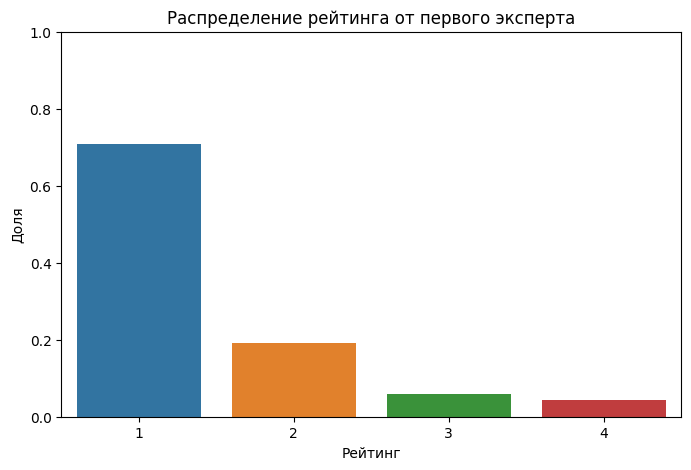

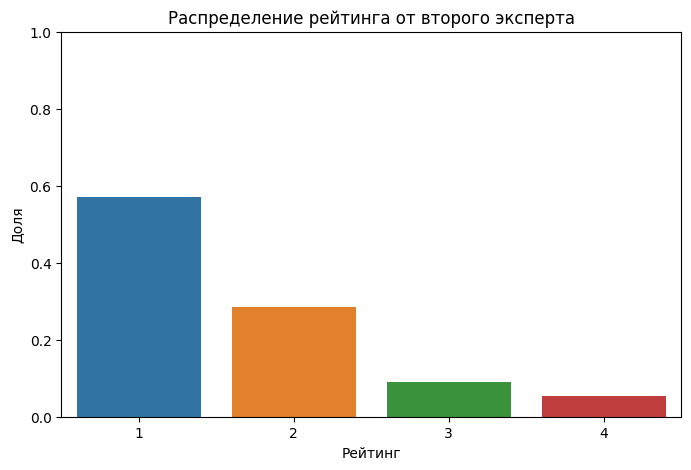

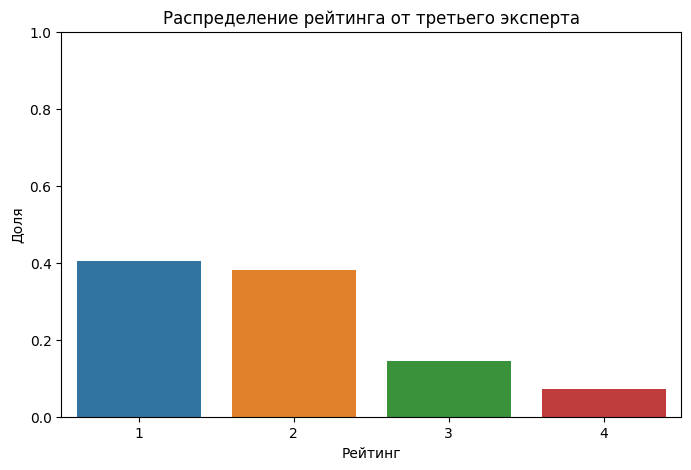

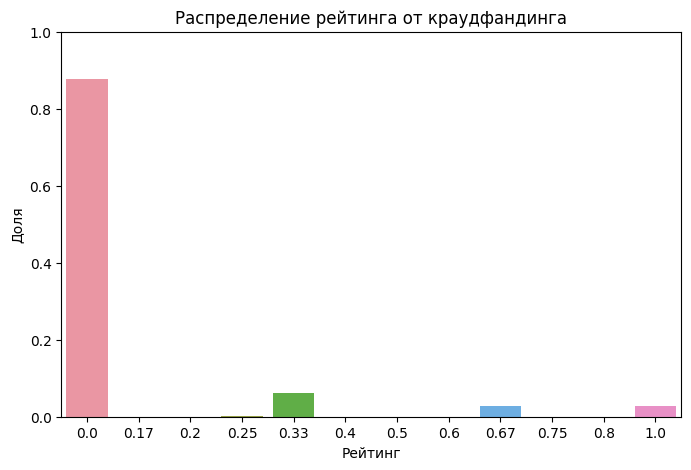

In [7]:
def plot_barplot(data, title):
    plt.figure(figsize=(8, 5))
    sns.barplot(x=np.round(data.value_counts().index, 2), y=data.value_counts(normalize=True))
    plt.title(title)
    plt.xlabel('Рейтинг')
    plt.ylabel('Доля')
    plt.ylim(0, 1)
    plt.show()

plot_barplot(df_expert['first'], 'Распределение рейтинга от первого эксперта')
plot_barplot(df_expert['second'], 'Распределение рейтинга от второго эксперта')
plot_barplot(df_expert['third'], 'Распределение рейтинга от третьего эксперта')
plot_barplot(df_crowd['share_pos'], 'Распределение рейтинга от краудфандинга')

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 </div>

Мы наблюдаем преобладающее количество неверных сочетаний фотографий и описаний, что ожидаемо, поскольку наш датасет включает всего лишь 1500 фотографий и ограниченное количество описаний. В то время как остальные созданы путем комбинирования уже имеющихся заведомо неверных пар фото-описания данных. Отметим, что первый эксперт наиболее категорично относится к несоответствиям, так как имеет наибольшую долю пар фото-описания, помеченных единицей (полное несоответствие).

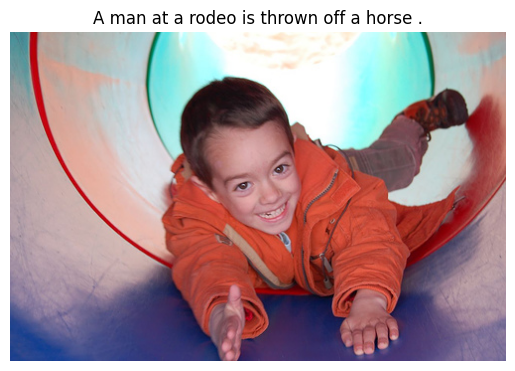

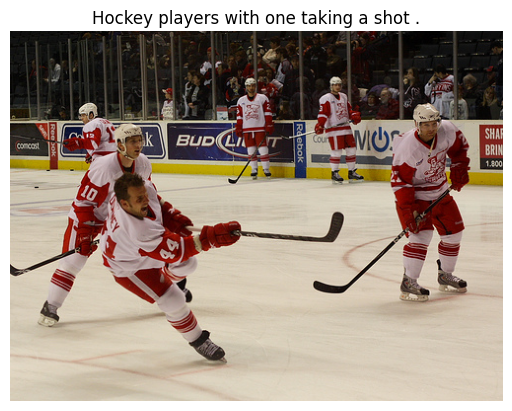

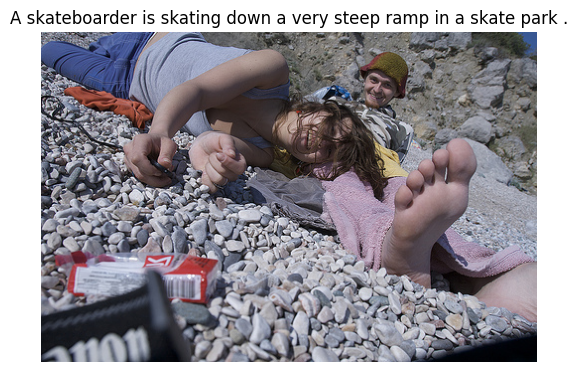

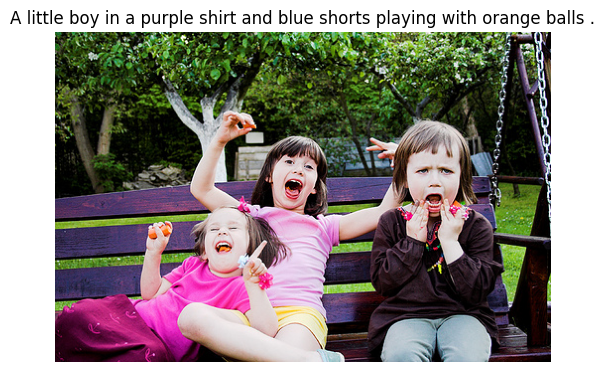

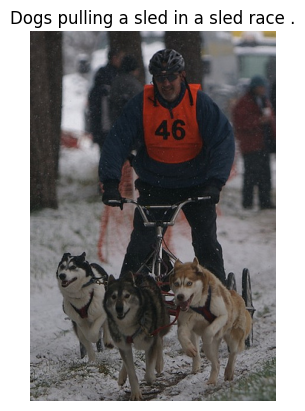

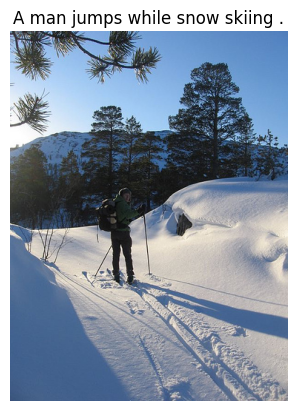

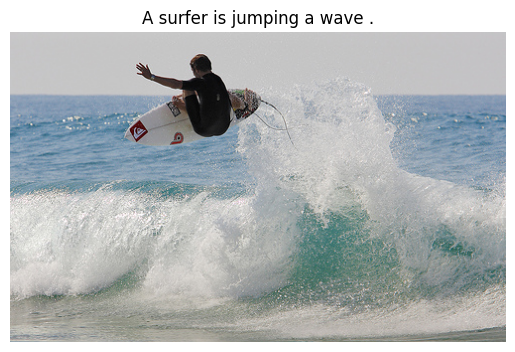

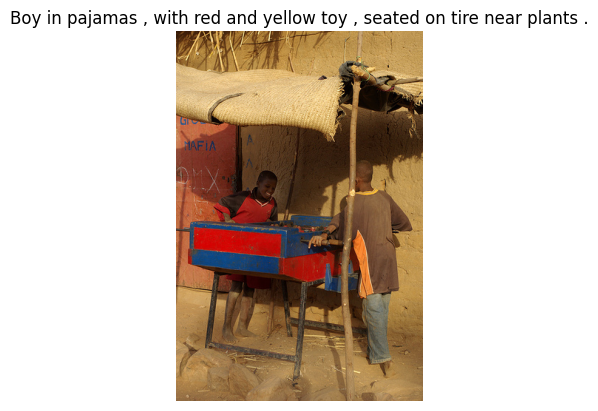

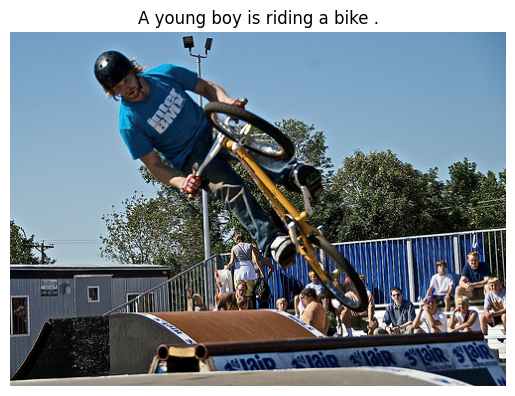

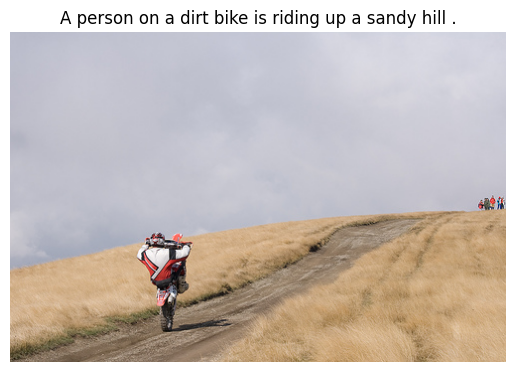

In [8]:
combine = df_train.sample(n = 10)[['image', 'query_text']].values.tolist()

for elem in combine:
    description = elem[1]
    image_path = elem[0]

    image = Image.open(TRAIN_IMG_PATH + '/' + image_path)


    fig, ax = plt.subplots()

    ax.imshow(image)
    ax.axis('off')

    ax.set_title(description, fontsize=12)

    plt.show()

Изображения, полученные на вход, имеют различные разрешения, а также являются цветными и высокого качества.

### Предобработка

In [9]:
df_expert['avg_expert'] = (df_expert['first'] + df_expert['second'] + df_expert['third']) / 3
df_expert['avg_expert'] = (df_expert['avg_expert'] - 1) / 3
df_expert.head()

image                     query_id  first  second  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2      1       1   
1  1056338697_4f7d7ce270.jpg  2718495608_d8533e3ac5.jpg#2      1       1   
2  1056338697_4f7d7ce270.jpg  3181701312_70a379ab6e.jpg#2      1       1   
3  1056338697_4f7d7ce270.jpg  3207358897_bfa61fa3c6.jpg#2      1       2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2      1       1   

   third  avg_expert  
0      1    0.000000  
1      2    0.111111  
2      2    0.111111  
3      2    0.222222  
4      2    0.111111

In [10]:
df = df_train.merge(df_expert, on = ['image', 'query_id'], how = 'outer').sort_values('image')
df = df.reset_index(drop = True)
print(f'df length = {len(df)}')
df.head()

df length = 5822


image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1056338697_4f7d7ce270.jpg   434792818_56375e203f.jpg#2   
2  1056338697_4f7d7ce270.jpg  3545652636_0746537307.jpg#2   
3  1056338697_4f7d7ce270.jpg  3360930596_1e75164ce6.jpg#2   
4  1056338697_4f7d7ce270.jpg  3286822339_5535af6b93.jpg#2   

                                          query_text  first  second  third  \
0  A young child is wearing blue goggles and sitt...      1       1      1   
1  A man and woman look back at the camera while ...      1       1      2   
2  A young boy dressed in a red uniform kicks the...      1       1      1   
3  A soccer ball is above the head of a man weari...      1       1      1   
4         Chinese market street in the winter time .      1       1      2   

   avg_expert  
0    0.000000  
1    0.111111  
2    0.000000  
3    0.000000  
4    0.111111

In [11]:
df = df.merge(df_crowd, on = ['image', 'query_id'], how = 'outer').sort_values('image')
print(f'df length = {len(df)}')
df.head()

df length = 51323


image                     query_id  \
0     1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
5838  1056338697_4f7d7ce270.jpg  2666179615_f05a9d8331.jpg#2   
5839  1056338697_4f7d7ce270.jpg  2666205903_8d287669e1.jpg#2   
5840  1056338697_4f7d7ce270.jpg  2774554310_007e980a90.jpg#2   
5841  1056338697_4f7d7ce270.jpg  2885387575_9127ea10f1.jpg#2   

                                             query_text  first  second  third  \
0     A young child is wearing blue goggles and sitt...    1.0     1.0    1.0   
5838                                                NaN    NaN     NaN    NaN   
5839                                                NaN    NaN     NaN    NaN   
5840                                                NaN    NaN     NaN    NaN   
5841                                                NaN    NaN     NaN    NaN   

      avg_expert  share_pos  count_pos  count_neg  
0            0.0   0.000000        0.0        3.0  
5838         NaN   0.666667        2.0        1.0  
5839         NaN   0.000000        0.0        3.0  
5840         NaN   0.000000        0.0        3.0  
5841         NaN   0.000000        0.0        3.0

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Позволь не согласиться с твоим решением.
    
    
Давай посмотрим на все доступные варианты объединения:
    
 - использовать соединение через outer, в этом случае, при корректной обработке пропусков мы можем получить более 50К размеченых пар. К плюсам данного подхода можно отнести большое количество данных. Минус - в основном это будут данные, размеченные краудсорсерами, а там качество раметки ниже.
 - использовать только эксертные оценки. плюс - высокое качество данных (разметка имеет шкалу). Минус - данных меньше.  Поясню по поводу качества разметки на примере: если на изображении одна собака, а в описании "две собаки бегут по берегу", то эксперты поставять соответствие 0,6-0,7 (переводя в шкалу 0-1), а краудсорсеры поставят 0.  Но на экспертных оценках модель хотя-бы научится находить собак, а на краудсор оценках ничему не начится.
    
 - использование соединения через left.  Данный подход очевидно проигрывает второму варианту: данных столько же, нужно дополнительно возиться с объединением, но качество разметки снижается.. Но это соответсвует предложениям авторов проекта, поэтому такой подход имеет право на жизнь
    
 - объединение через inner. Тут все плохо - и данных ОЧЕНЬ мало (в два раза меньше, чем использовать только экспертные оценки) и качество у них "подпорчено". И навыков по обработке пропусков не получаем.....
    
    
Поэтому давай "спасем" хотя-бы немного данных.  Предлагаю тебе использовать простую стратегию работы с пропусками: если нет оценки краудсорса - используем экспертную оценку, если нет оценки экспертов - краудсорс оценку, а если есть обе - берем (взвешенное) среднее.    
</div>


In [12]:
print('Count of unqie image =', len(df['image'].unique()))

Count of unqie image = 1000


В процессе объединения таблиц было не было утрачено ни одной уникальной изображений.

Если отсутствует оценка от краудсорса, мы воспользуемся экспертной оценкой, и наоборот. Если у нас есть и оценка экспертов, и оценка краудфандинга, то мы их усредним, применяя весовые коэффициенты. Например, рассмотрим следующую ситуацию: для экспертов (avg_expert) установлен коэффициент 0.60, а для краудфандинга (share_pos) - 0.40. Этот метод придает приоритет экспертам, поскольку они проверенные специалисты с более низкой вероятностью ошибки и предоставляют более точные оценки.

In [13]:
df['total_rating'] = 0
df['total_rating'] =  np.where(~df['avg_expert'].isna() & ~df['share_pos'].isna(), df['avg_expert'] * 0.6 + df['share_pos'] * 0.4, df['total_rating'])
df['total_rating'] =  np.where(df['avg_expert'].isna() & ~df['share_pos'].isna(), df['share_pos'], df['total_rating'])
df['total_rating'] =  np.where(~df['avg_expert'].isna() & df['share_pos'].isna(), df['avg_expert'], df['total_rating'])
df['total_rating']

0        0.000000
5838     0.666667
5839     0.000000
5840     0.000000
5841     0.000000
           ...   
51290    0.000000
51291    0.666667
51292    0.000000
51294    0.000000
51322    0.666667
Name: total_rating, Length: 51323, dtype: float64

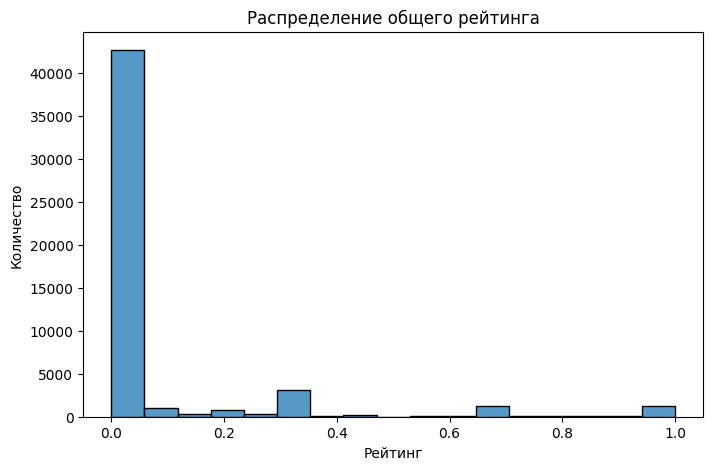

In [14]:
plt.figure(figsize = (8, 5))
sns.histplot(df.total_rating)
plt.title('Распределение общего рейтинга')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

Имеем большое количество нулевых значений.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
Пожалуста не забывай про подведение итогов и вывыды. Как я писал тебе выше, основной резултат этапа "предобработки" - это итоговый датфрейм. Так покажи его "во всей красе", как минимум head(sample) + info(shape)
</div>


In [15]:
df.head(10)

image                     query_id  \
0     1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
5838  1056338697_4f7d7ce270.jpg  2666179615_f05a9d8331.jpg#2   
5839  1056338697_4f7d7ce270.jpg  2666205903_8d287669e1.jpg#2   
5840  1056338697_4f7d7ce270.jpg  2774554310_007e980a90.jpg#2   
5841  1056338697_4f7d7ce270.jpg  2885387575_9127ea10f1.jpg#2   
5842  1056338697_4f7d7ce270.jpg  2893374123_087f98d58a.jpg#2   
5843  1056338697_4f7d7ce270.jpg  2914206497_5e36ac6324.jpg#2   
5845  1056338697_4f7d7ce270.jpg  3044500219_778f9f2b71.jpg#2   
5846  1056338697_4f7d7ce270.jpg  3047264346_e24601bfbf.jpg#2   
5847  1056338697_4f7d7ce270.jpg  3110649716_c17e14670e.jpg#2   

                                             query_text  first  second  third  \
0     A young child is wearing blue goggles and sitt...    1.0     1.0    1.0   
5838                                                NaN    NaN     NaN    NaN   
5839                                                NaN    NaN     NaN    NaN   
5840                                                NaN    NaN     NaN    NaN   
5841                                                NaN    NaN     NaN    NaN   
5842                                                NaN    NaN     NaN    NaN   
5843                                                NaN    NaN     NaN    NaN   
5845                                                NaN    NaN     NaN    NaN   
5846                                                NaN    NaN     NaN    NaN   
5847                                                NaN    NaN     NaN    NaN   

      avg_expert  share_pos  count_pos  count_neg  total_rating  
0            0.0   0.000000        0.0        3.0      0.000000  
5838         NaN   0.666667        2.0        1.0      0.666667  
5839         NaN   0.000000        0.0        3.0      0.000000  
5840         NaN   0.000000        0.0        3.0      0.000000  
5841         NaN   0.000000        0.0        3.0      0.000000  
5842         NaN   0.000000        0.0        3.0      0.000000  
5843         NaN   0.000000        0.0        3.0      0.000000  
5845         NaN   0.000000        0.0        3.0      0.000000  
5846         NaN   0.000000        0.0        3.0      0.000000  
5847         NaN   0.000000        0.0        3.0      0.000000

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51323 entries, 0 to 51322
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         51323 non-null  object 
 1   query_id      51323 non-null  object 
 2   query_text    5822 non-null   object 
 3   first         5822 non-null   float64
 4   second        5822 non-null   float64
 5   third         5822 non-null   float64
 6   avg_expert    5822 non-null   float64
 7   share_pos     47830 non-null  float64
 8   count_pos     47830 non-null  float64
 9   count_neg     47830 non-null  float64
 10  total_rating  51323 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.7+ MB


Правильно получили финальную оценку, но в ходе соидинений получили пропуски в `query_text`.

In [17]:
query_id_to_text = df[df['query_text'].notna()][['query_id', 'query_text']].drop_duplicates().set_index('query_id')['query_text']

df['query_text'] = df['query_id'].map(query_id_to_text)
df = df.dropna(subset = 'query_text').sort_values('image').reset_index(drop=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50214 entries, 0 to 50213
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         50214 non-null  object 
 1   query_id      50214 non-null  object 
 2   query_text    50214 non-null  object 
 3   first         5822 non-null   float64
 4   second        5822 non-null   float64
 5   third         5822 non-null   float64
 6   avg_expert    5822 non-null   float64
 7   share_pos     46721 non-null  float64
 8   count_pos     46721 non-null  float64
 9   count_neg     46721 non-null  float64
 10  total_rating  50214 non-null  float64
dtypes: float64(8), object(3)
memory usage: 4.2+ MB


In [19]:
df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1056338697_4f7d7ce270.jpg   700884207_d3ec546494.jpg#2   
2  1056338697_4f7d7ce270.jpg  3485425825_c2f3446e73.jpg#2   
3  1056338697_4f7d7ce270.jpg  2623930900_b9df917b82.jpg#2   
4  1056338697_4f7d7ce270.jpg  2944952557_8484f0da8f.jpg#2   

                                          query_text  first  second  third  \
0  A young child is wearing blue goggles and sitt...    1.0     1.0    1.0   
1  A woman holds a fat baby with sunglasses and a...    NaN     NaN    NaN   
2  A young girl is standing on the back of a man ...    NaN     NaN    NaN   
3  A man with disheveled hair and facial hair in ...    NaN     NaN    NaN   
4    A woman in blue has a yellow ball in her mitt .    NaN     NaN    NaN   

   avg_expert  share_pos  count_pos  count_neg  total_rating  
0         0.0        0.0        0.0        3.0           0.0  
1         NaN        0.0        0.0        3.0           0.0  
2         NaN        0.0        0.0        3.0           0.0  
3         NaN        0.0        0.0        3.0           0.0  
4         NaN        0.0        0.0        3.0           0.0

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 👍 Еще один интересный и нечевидный шаг по "майнингу" данных. Если внимательно посмотреть на структуру query_id, то окажется, что он содержит в себе имя файла, для которого написана аннотация. Т.е. у нас есть около 1000 гарантированно подходящих друг к другу пар изображение-описание.  Было бы неплохо обогатить ими наши данные.
    
    
</div>

## 2. Проверка данных

В некоторых странах, где работает ваша компания, действуют ограничения по обработке изображений: поисковым сервисам и сервисам, предоставляющим возможность поиска, запрещено без разрешения родителей или законных представителей предоставлять любую информацию, в том числе, но не исключительно тексты, изображения, видео и аудио, содержащие описание, изображение или запись голоса детей. Ребёнком считается любой человек, не достигший 16 лет.

В вашем сервисе строго следуют законам стран, в которых работают. Поэтому при попытке посмотреть изображения, запрещённые законодательством, вместо картинок показывается дисклеймер:

> This image is unavailable in your country in compliance with local laws
>

Однако у вас в PoC нет возможности воспользоваться данным функционалом. Поэтому все изображения, которые нарушают данный закон, нужно удалить из обучающей выборки.

In [20]:
df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1056338697_4f7d7ce270.jpg   700884207_d3ec546494.jpg#2   
2  1056338697_4f7d7ce270.jpg  3485425825_c2f3446e73.jpg#2   
3  1056338697_4f7d7ce270.jpg  2623930900_b9df917b82.jpg#2   
4  1056338697_4f7d7ce270.jpg  2944952557_8484f0da8f.jpg#2   

                                          query_text  first  second  third  \
0  A young child is wearing blue goggles and sitt...    1.0     1.0    1.0   
1  A woman holds a fat baby with sunglasses and a...    NaN     NaN    NaN   
2  A young girl is standing on the back of a man ...    NaN     NaN    NaN   
3  A man with disheveled hair and facial hair in ...    NaN     NaN    NaN   
4    A woman in blue has a yellow ball in her mitt .    NaN     NaN    NaN   

   avg_expert  share_pos  count_pos  count_neg  total_rating  
0         0.0        0.0        0.0        3.0           0.0  
1         NaN        0.0        0.0        3.0           0.0  
2         NaN        0.0        0.0        3.0           0.0  
3         NaN        0.0        0.0        3.0           0.0  
4         NaN        0.0        0.0        3.0           0.0

In [21]:
temp = df[['query_id', 'query_text']].drop_duplicates()
temp = temp[temp['query_text'].str.contains('|'.join(BLOCK), case=False, na=False)]
temp = temp['query_id'].str[:-2].sort_values()
temp

574      106490881_5a2dd9b7bd.jpg
57      1096395242_fc69f0ae5a.jpg
430     1122944218_8eb3607403.jpg
559     1131932671_c8d17751b3.jpg
25       114051287_dd85625a04.jpg
                  ...            
1059     880220939_0ef1c37f1f.jpg
100      909191414_1cf5d85821.jpg
246      917574521_74fab68514.jpg
1490     968081289_cdba83ce2e.jpg
999      979383193_0a542a059d.jpg
Name: query_id, Length: 294, dtype: object

In [22]:
df = df[~df['image'].isin(temp)].reset_index(drop = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35708 entries, 0 to 35707
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   image         35708 non-null  object 
 1   query_id      35708 non-null  object 
 2   query_text    35708 non-null  object 
 3   first         4064 non-null   float64
 4   second        4064 non-null   float64
 5   third         4064 non-null   float64
 6   avg_expert    4064 non-null   float64
 7   share_pos     33380 non-null  float64
 8   count_pos     33380 non-null  float64
 9   count_neg     33380 non-null  float64
 10  total_rating  35708 non-null  float64
dtypes: float64(8), object(3)
memory usage: 3.0+ MB


In [23]:
df

image                     query_id  \
0      1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1      1056338697_4f7d7ce270.jpg   700884207_d3ec546494.jpg#2   
2      1056338697_4f7d7ce270.jpg  3485425825_c2f3446e73.jpg#2   
3      1056338697_4f7d7ce270.jpg  2623930900_b9df917b82.jpg#2   
4      1056338697_4f7d7ce270.jpg  2944952557_8484f0da8f.jpg#2   
...                          ...                          ...   
35703   997722733_0cb5439472.jpg   485245061_5a5de43e20.jpg#2   
35704   997722733_0cb5439472.jpg   543007912_23fc735b99.jpg#2   
35705   997722733_0cb5439472.jpg  3462454965_a481809cea.jpg#2   
35706   997722733_0cb5439472.jpg  2968182121_b3b491df85.jpg#2   
35707   997722733_0cb5439472.jpg   997722733_0cb5439472.jpg#2   

                                              query_text  first  second  \
0      A young child is wearing blue goggles and sitt...    1.0     1.0   
1      A woman holds a fat baby with sunglasses and a...    NaN     NaN   
2      A young girl is standing on the back of a man ...    NaN     NaN   
3      A man with disheveled hair and facial hair in ...    NaN     NaN   
4        A woman in blue has a yellow ball in her mitt .    NaN     NaN   
...                                                  ...    ...     ...   
35703                         A man kneels in the snow .    NaN     NaN   
35704                     Two girls with orange shirts .    NaN     NaN   
35705  Three black dogs , two with tan markings , are...    NaN     NaN   
35706                              Two greyhounds race .    1.0     1.0   
35707  A person in a red shirt climbing up a rock fac...    NaN     NaN   

       third  avg_expert  share_pos  count_pos  count_neg  total_rating  
0        1.0         0.0   0.000000        0.0        3.0      0.000000  
1        NaN         NaN   0.000000        0.0        3.0      0.000000  
2        NaN         NaN   0.000000        0.0        3.0      0.000000  
3        NaN         NaN   0.000000        0.0        3.0      0.000000  
4        NaN         NaN   0.000000        0.0        3.0      0.000000  
...      ...         ...        ...        ...        ...           ...  
35703    NaN         NaN   0.000000        0.0        3.0      0.000000  
35704    NaN         NaN   0.000000        0.0        3.0      0.000000  
35705    NaN         NaN   0.000000        0.0        3.0      0.000000  
35706    1.0         0.0        NaN        NaN        NaN      0.000000  
35707    NaN         NaN   0.666667        2.0        1.0      0.666667  

[35708 rows x 11 columns]

В данном подходе, акцент делается на особенности, заключающейся в атрибуте query_id. Этот атрибут содержит информацию о названии изображения, для которого он был создан.

Первым шагом является выявление нежелательных комментариев.
Затем, на следующем этапе, мы применяем операцию обрезки двух последних символов в атрибуте query_id для каждого из нежелательных комментариев. Это позволяет нам создать список изображений, которые связаны с этими нежелательными комментариями.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Я вижу две ошибки:
 - во первых ты удаляешь пары, где рейтинг соответствия МЕНЬШЕ 0.6
 - твой подход оставит изображение с ребенком, если у него есть подпись "собака" и низкий рейтинг соответствия. Даже если в соседней строке это же изображение содержит описание "ребенок" и рейтинг соответствия высокий.
    
Посмотри ниже рекомендации по выполнению чистки.    
</div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
    
Есть два способа выполнить эту задачу:
    
 - Определить список плохих изображений, как изображения удовлетворяющие условиям:
    - Комментарий содержит плохие слова
    - <b>Оценка соответствия комментария и изображения выше порога.</b>
 - Удалить из нашего датасета все пары "изображение/описание" с плохими изображениями.
    

И второй, очень красивый способ. Он основан на том, что `query_id` содержит в с себе имя изображения, для которого он был написан (такая пасхалочка от авторов датасета).
    
 - Определить список плохих комментариев
 - У `query_id`  плохих комментариев отрезать два последних символа и получим список плохих изображений.
    
    
    
    
    
</div>

## 3. Векторизация изображений

Перейдём к векторизации изображений.

Самый примитивный способ — прочесть изображение и превратить полученную матрицу в вектор. Такой способ нам не подходит: длина векторов может быть сильно разной, так как размеры изображений разные. Поэтому стоит обратиться к свёрточным сетям: они позволяют "выделить" главные компоненты изображений. Как это сделать? Нужно выбрать какую-либо архитектуру, например ResNet-18, посмотреть на слои и исключить полносвязные слои, которые отвечают за конечное предсказание. При этом можно загрузить модель данной архитектуры, предварительно натренированную на датасете ImageNet.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Здесь замечание скорее относится к подаче.

Ты придумал подход, диаметрально противополоджный тому, что предлагают авторы проекта и что пишешь ты сам в предыдущем абзаце.
    
Поэтому я настаиваю на обосновании и описании предоженного тобой подхода. Ты же не думаешь, что каждый читатель твоего проекта знает все современные архитектуры? Конечно, документция на BLIP есть на на huggingFace, но заставлять читателя и тем более заказчика искать её это некорректно.

</div>

In [24]:
model = models.resnet18(pretrained=True)
model.fc = torch.nn.Identity()
model.eval()
''

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 54.6MB/s]


''

In [25]:
def get_img_embendings(row, is_train = True):
    transform = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

    if is_train:
        image_path = os.path.join(TRAIN_IMG_PATH, row['image'])
    else:
        image_path = os.path.join(TEST_IMG_PATH, row['image'])

    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)
    with torch.no_grad():
        embedding = model(image)
        embedding = torch.nn.functional.normalize(embedding, p=2, dim=1)
    return embedding[0].tolist()

temp = pd.DataFrame({'image': df['image'].unique()})
temp['img_embending'] = temp.apply(get_img_embendings, axis = 1)

In [26]:
temp.index = temp['image']
temp = temp.drop('image', axis = 1)
temp = temp['img_embending']
temp.head()

image
1056338697_4f7d7ce270.jpg    [0.02773432619869709, 0.12117165327072144, 0.1...
1082379191_ec1e53f996.jpg    [0.02422618493437767, 0.02652730606496334, 0.0...
1084040636_97d9633581.jpg    [0.027674490585923195, 0.021715691313147545, 0...
1107246521_d16a476380.jpg    [0.04288870841264725, 0.04668506234884262, 0.0...
1119015538_e8e796281e.jpg    [0.033330585807561874, 0.016188984736800194, 0...
Name: img_embending, dtype: object

In [27]:
df['img_embending'] = df['image'].map(temp)
df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1056338697_4f7d7ce270.jpg   700884207_d3ec546494.jpg#2   
2  1056338697_4f7d7ce270.jpg  3485425825_c2f3446e73.jpg#2   
3  1056338697_4f7d7ce270.jpg  2623930900_b9df917b82.jpg#2   
4  1056338697_4f7d7ce270.jpg  2944952557_8484f0da8f.jpg#2   

                                          query_text  first  second  third  \
0  A young child is wearing blue goggles and sitt...    1.0     1.0    1.0   
1  A woman holds a fat baby with sunglasses and a...    NaN     NaN    NaN   
2  A young girl is standing on the back of a man ...    NaN     NaN    NaN   
3  A man with disheveled hair and facial hair in ...    NaN     NaN    NaN   
4    A woman in blue has a yellow ball in her mitt .    NaN     NaN    NaN   

   avg_expert  share_pos  count_pos  count_neg  total_rating  \
0         0.0        0.0        0.0        3.0           0.0   
1         NaN        0.0        0.0        3.0           0.0   
2         NaN        0.0        0.0        3.0           0.0   
3         NaN        0.0        0.0        3.0           0.0   
4         NaN        0.0        0.0        3.0           0.0   

                                       img_embending  
0  [0.02773432619869709, 0.12117165327072144, 0.1...  
1  [0.02773432619869709, 0.12117165327072144, 0.1...  
2  [0.02773432619869709, 0.12117165327072144, 0.1...  
3  [0.02773432619869709, 0.12117165327072144, 0.1...  
4  [0.02773432619869709, 0.12117165327072144, 0.1...

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
Здесь могу выделить две проблемы:

 - При перезапуске код падает. Причем падает он даже если я убираю комментарии. Пожалуйста исправь.
 - Название колонки `text_from_text` вводит в заблуждение.  Ведь это описание, полученное из изображения. Или я неправильно разобрался в том, что ты делаешь?    
    
</div>

Созданы эмбеддинги для всех предоставленных изображений.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
    
К сожалению это пока не эмбеддинги.

</div>

## 4. Векторизация текстов

Следующий этап — векторизация текстов. Вы можете поэкспериментировать с несколькими способами векторизации текстов:

- tf-idf
- word2vec
- \*трансформеры (например Bert)

\* — если вы изучали трансформеры в спринте Машинное обучение для текстов.


In [28]:
tokenizer = AutoTokenizer.from_pretrained('BAAI/bge-base-en-v1.5')
bert = AutoModel.from_pretrained('BAAI/bge-base-en-v1.5')
bert.to(DEVICE)
bert.eval()
''

''

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Если не секрет, почему именно эта модель?

</div>

In [29]:
def get_text_embedding(text):
    inputs = tokenizer(text, padding=True, truncation=True, return_tensors='pt').to(DEVICE)

    with torch.no_grad():
        model_output = bert(**inputs)
        sentence_embeddings = model_output.last_hidden_state[:, 0]

    sentence_embeddings = torch.nn.functional.normalize(sentence_embeddings, p=2, dim=1)
    sentence_embeddings = sentence_embeddings[0].tolist()
    return sentence_embeddings

temp = pd.DataFrame({'query_text': df['query_text'].unique()})
temp['query_embending'] = temp['query_text'].apply(get_text_embedding)

In [30]:
temp.index = temp['query_text']
temp = temp.drop('query_text', axis = 1)
temp = temp['query_embending']
temp.head()

query_text
A young child is wearing blue goggles and sitting in a float in a pool .                    [0.030293146148324013, 0.01801173947751522, 0....
A woman holds a fat baby with sunglasses and a denim hat .                                  [-0.00713797053322196, -0.046521276235580444, ...
A young girl is standing on the back of a man 's bicycle while the man peddles forward .    [-0.0032756177242845297, -0.05923871695995331,...
A man with disheveled hair and facial hair in a crowd of people is smiling .                [-0.00897099357098341, -0.01882203482091427, 0...
A woman in blue has a yellow ball in her mitt .                                             [-0.06571607291698456, -0.01792014017701149, -...
Name: query_embending, dtype: object

In [31]:
df['query_embending'] = df['query_text'].map(temp)
df.head()

image                     query_id  \
0  1056338697_4f7d7ce270.jpg  2549968784_39bfbe44f9.jpg#2   
1  1056338697_4f7d7ce270.jpg   700884207_d3ec546494.jpg#2   
2  1056338697_4f7d7ce270.jpg  3485425825_c2f3446e73.jpg#2   
3  1056338697_4f7d7ce270.jpg  2623930900_b9df917b82.jpg#2   
4  1056338697_4f7d7ce270.jpg  2944952557_8484f0da8f.jpg#2   

                                          query_text  first  second  third  \
0  A young child is wearing blue goggles and sitt...    1.0     1.0    1.0   
1  A woman holds a fat baby with sunglasses and a...    NaN     NaN    NaN   
2  A young girl is standing on the back of a man ...    NaN     NaN    NaN   
3  A man with disheveled hair and facial hair in ...    NaN     NaN    NaN   
4    A woman in blue has a yellow ball in her mitt .    NaN     NaN    NaN   

   avg_expert  share_pos  count_pos  count_neg  total_rating  \
0         0.0        0.0        0.0        3.0           0.0   
1         NaN        0.0        0.0        3.0           0.0   
2         NaN        0.0        0.0        3.0           0.0   
3         NaN        0.0        0.0        3.0           0.0   
4         NaN        0.0        0.0        3.0           0.0   

                                       img_embending  \
0  [0.02773432619869709, 0.12117165327072144, 0.1...   
1  [0.02773432619869709, 0.12117165327072144, 0.1...   
2  [0.02773432619869709, 0.12117165327072144, 0.1...   
3  [0.02773432619869709, 0.12117165327072144, 0.1...   
4  [0.02773432619869709, 0.12117165327072144, 0.1...   

                                     query_embending  
0  [0.030293146148324013, 0.01801173947751522, 0....  
1  [-0.00713797053322196, -0.046521276235580444, ...  
2  [-0.0032756177242845297, -0.05923871695995331,...  
3  [-0.00897099357098341, -0.01882203482091427, 0...  
4  [-0.06571607291698456, -0.01792014017701149, -...

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Ок, получили эмбеддинги текстового описания + текстового описания изображения. </div>

## 5. Объединение векторов

Подготовьте данные для обучения: объедините векторы изображений и векторы текстов с целевой переменной.

In [32]:
img_embends = df['img_embending'].apply(pd.Series)
img_embends = img_embends.rename(columns=lambda x: f'img_embending{x + 1}')
print('img_embending shape', img_embends.shape)
df = pd.concat([img_embends, df.drop('img_embending', axis=1)], axis=1)

query_embend = df['query_embending'].apply(pd.Series)
query_embend = query_embend.rename(columns=lambda x: f'query_embending{x+ 1}')
print('query_embending shape', query_embend.shape)
df = pd.concat([query_embend, df.drop('query_embending', axis=1)], axis=1)
df.head()

img_embending shape (35708, 512)
query_embending shape (35708, 768)


query_embending1  query_embending2  query_embending3  query_embending4  \
0          0.030293          0.018012          0.009060          0.014831   
1         -0.007138         -0.046521          0.001468         -0.040664   
2         -0.003276         -0.059239         -0.008759         -0.012021   
3         -0.008971         -0.018822          0.046829          0.011399   
4         -0.065716         -0.017920         -0.014589         -0.023649   

   query_embending5  query_embending6  query_embending7  query_embending8  \
0          0.089425         -0.009530         -0.056477          0.001096   
1          0.056771          0.085832         -0.075545          0.009674   
2          0.094498          0.008597         -0.016839          0.041489   
3          0.023331          0.028628         -0.000676          0.025804   
4          0.032125          0.000215         -0.016350          0.013521   

   query_embending9  query_embending10  ...                     query_id  \
0         -0.021990          -0.024295  ...  2549968784_39bfbe44f9.jpg#2   
1         -0.056803          -0.058776  ...   700884207_d3ec546494.jpg#2   
2         -0.025618          -0.035441  ...  3485425825_c2f3446e73.jpg#2   
3         -0.036934          -0.031897  ...  2623930900_b9df917b82.jpg#2   
4         -0.060808          -0.029845  ...  2944952557_8484f0da8f.jpg#2   

                                          query_text  first  second  third  \
0  A young child is wearing blue goggles and sitt...    1.0     1.0    1.0   
1  A woman holds a fat baby with sunglasses and a...    NaN     NaN    NaN   
2  A young girl is standing on the back of a man ...    NaN     NaN    NaN   
3  A man with disheveled hair and facial hair in ...    NaN     NaN    NaN   
4    A woman in blue has a yellow ball in her mitt .    NaN     NaN    NaN   

   avg_expert  share_pos  count_pos  count_neg  total_rating  
0         0.0        0.0        0.0        3.0           0.0  
1         NaN        0.0        0.0        3.0           0.0  
2         NaN        0.0        0.0        3.0           0.0  
3         NaN        0.0        0.0        3.0           0.0  
4         NaN        0.0        0.0        3.0           0.0  

[5 rows x 1291 columns]

In [33]:
df = df.drop(['query_id', 'query_text', 'first',
              'second', 'third', 'avg_expert', 'share_pos',
              'count_pos', 'count_neg'], axis = 1)

df.head()

query_embending1  query_embending2  query_embending3  query_embending4  \
0          0.030293          0.018012          0.009060          0.014831   
1         -0.007138         -0.046521          0.001468         -0.040664   
2         -0.003276         -0.059239         -0.008759         -0.012021   
3         -0.008971         -0.018822          0.046829          0.011399   
4         -0.065716         -0.017920         -0.014589         -0.023649   

   query_embending5  query_embending6  query_embending7  query_embending8  \
0          0.089425         -0.009530         -0.056477          0.001096   
1          0.056771          0.085832         -0.075545          0.009674   
2          0.094498          0.008597         -0.016839          0.041489   
3          0.023331          0.028628         -0.000676          0.025804   
4          0.032125          0.000215         -0.016350          0.013521   

   query_embending9  query_embending10  ...  img_embending505  \
0         -0.021990          -0.024295  ...          0.011777   
1         -0.056803          -0.058776  ...          0.011777   
2         -0.025618          -0.035441  ...          0.011777   
3         -0.036934          -0.031897  ...          0.011777   
4         -0.060808          -0.029845  ...          0.011777   

   img_embending506  img_embending507  img_embending508  img_embending509  \
0          0.029135          0.046109          0.030009          0.047828   
1          0.029135          0.046109          0.030009          0.047828   
2          0.029135          0.046109          0.030009          0.047828   
3          0.029135          0.046109          0.030009          0.047828   
4          0.029135          0.046109          0.030009          0.047828   

   img_embending510  img_embending511  img_embending512  \
0          0.003397          0.042233          0.003923   
1          0.003397          0.042233          0.003923   
2          0.003397          0.042233          0.003923   
3          0.003397          0.042233          0.003923   
4          0.003397          0.042233          0.003923   

                       image  total_rating  
0  1056338697_4f7d7ce270.jpg           0.0  
1  1056338697_4f7d7ce270.jpg           0.0  
2  1056338697_4f7d7ce270.jpg           0.0  
3  1056338697_4f7d7ce270.jpg           0.0  
4  1056338697_4f7d7ce270.jpg           0.0  

[5 rows x 1282 columns]

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
 Вектора, полученные из текста и изображения объеденены👍 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/b/ba/Warning_sign_4.0.png" align=left width=44, heigth=33>
<div class="alert alert-warning">
Мне кажется ты зря постоянно "тянешь" данные в датафрейм. Датафрейм это круто и очень удобно. Но для храненя больших объемов однородных данных лучше использоваь numpy array.  Они и по памяти оптимальнее и скорость доступа к данным выше и это базовый формат данных для машинного обучения, все модели прекрасно с работают с матрицами. А датафрейм это надстройка,позволяющая удобно работать с разнородными данными, но слишком уж неправильно пытаться втягивать такие признаки в датафрейм.
</div>

## 6. Обучение модели предсказания соответствия

Для обучения разделите датасет на тренировочную и тестовую выборки. Простое случайное разбиение не подходит: нужно исключить попадание изображения и в обучающую, и в тестовую выборки.
Для того чтобы учесть изображения при разбиении, можно воспользоваться классом [GroupShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GroupShuffleSplit.html) из библиотеки sklearn.model_selection.

Код ниже разбивает датасет на тренировочную и тестовую выборки в пропорции 7:3 так, что строки с одинаковым значением 'group_column' будут содержаться либо в тестовом, либо в тренировочном датасете.

```
from sklearn.model_selection import GroupShuffleSplit
gss = GroupShuffleSplit(n_splits=1, train_size=.7, random_state=42)
train_indices, test_indices = next(gss.split(X=df.drop(columns=['target']), y=df['target'], groups=df['group_column']))
train_df, test_df = df.loc[train_indices], df.loc[test_indices]

```

Какую модель использовать — выберите самостоятельно. Также вам предстоит выбрать метрику качества либо реализовать свою.

In [34]:
gss_valid = GroupShuffleSplit(n_splits=1, train_size=0.80, random_state=1234)

train_indices, valid_indices = next(gss_valid.split(X=df.drop(columns=['total_rating']), y=df['total_rating'], groups=df['image']))
train_df, valid_df = df.loc[train_indices].reset_index(drop = True), df.loc[valid_indices].reset_index(drop = True)

print('Length of train_df:', len(train_df))
print('Length of valid_df:', len(valid_df))

Length of train_df: 28607
Length of valid_df: 7101


<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Отлично, благодаря использованию GroupShuffleSplit ты исключаешь попадание одного изображения в обучающий и валидационный наборы.</div>

In [35]:
[i for i in train_df.image.unique() if i in valid_df.image.unique()]

[]

Повторов image не наблюдается.

In [36]:
valid_df = valid_df.drop(columns=['image'])
train_df = train_df.drop(columns=['image'])

train_features = train_df.drop(columns=['total_rating'])
train_target = train_df['total_rating']

valid_features = valid_df.drop(columns=['total_rating'])
valid_target = valid_df['total_rating']

train_img_embending = train_features.iloc[:, 768:]
train_query_embending = train_features.iloc[:, :768]

valid_img_embending = valid_features.iloc[:, 768:]
valid_query_embending = valid_features.iloc[:, :768]

In [37]:
train_img_embending_tensor = torch.tensor(train_img_embending.values, dtype=torch.float32).to(DEVICE)
train_query_embending_tensor = torch.tensor(train_query_embending.values, dtype=torch.float32).to(DEVICE)

valid_img_embending_tensor = torch.tensor(valid_img_embending.values, dtype=torch.float32).to(DEVICE)
valid_query_embending_tensor = torch.tensor(valid_query_embending.values, dtype=torch.float32).to(DEVICE)

train_target_tensor = torch.tensor(train_target.values, dtype=torch.float32).to(DEVICE)
valid_target_tensor = torch.tensor(valid_target.values, dtype=torch.float32).to(DEVICE)

In [38]:
class Dataset(Dataset):
    def __init__(self, image_embeddings, text_embeddings, targets):
        self.image_embeddings = image_embeddings
        self.text_embeddings = text_embeddings
        self.targets = targets

    def __len__(self):
        return len(self.image_embeddings)

    def __getitem__(self, idx):
        img_emb = self.image_embeddings[idx]
        txt_emb = self.text_embeddings[idx]
        target = self.targets[idx]
        return img_emb, txt_emb, target


batch_size = 32
train_dataset = Dataset(train_img_embending_tensor, train_query_embending_tensor, train_target_tensor)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

valid_dataset = Dataset(valid_img_embending_tensor, valid_query_embending_tensor, valid_target_tensor)
valid_dataloader = DataLoader(valid_dataset, batch_size=batch_size, shuffle=False)

In [39]:
class NeuralNetwork(nn.Module):
    def __init__(self, image_embedding_size, text_embedding_size):
        super(NeuralNetwork, self).__init__()

        self.image_branch = nn.Sequential(
            nn.Linear(image_embedding_size, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5)
        )

        self.text_branch = nn.Sequential(
            nn.Linear(text_embedding_size, 64),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.5)
        )

    def forward_one(self, x, branch):
        x = branch(x)
        return x

    def forward(self, img, txt):
        img_output = self.forward_one(img, self.image_branch)
        txt_output = self.forward_one(txt, self.text_branch)
        similarity = torch.nn.functional.cosine_similarity(img_output, txt_output, dim=1)
        return similarity


In [40]:
net = NeuralNetwork(512, 768).to(DEVICE)

optimizer = optim.Adam(net.parameters(), lr=1e-6, weight_decay=1e-3)

criterion = nn.MSELoss()
l1_lambda = 1e-3
num_epochs = 40
for epoch in range(num_epochs):
    net.train()
    total_loss = 0.0

    for i, (img_emb, query_emb, target) in enumerate(train_dataloader):
        optimizer.zero_grad()

        output = net(img_emb, query_emb)
        loss = criterion(output, target)

        l1_reg = torch.tensor(0.0, requires_grad=True).to(DEVICE)
        for param in net.parameters():
            l1_reg += torch.abs(param).sum()
        loss = loss + l1_lambda * l1_reg

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {total_loss / (i + 1):.4f}')

    net.eval()
    total_mae = 0.0

    with torch.no_grad():
        for i, (img_emb, query_emb, target) in enumerate(valid_dataloader):
            output = net(img_emb, query_emb)
            mae = torch.abs(output - target).mean().item()
            total_mae += mae

    average_mae = total_mae / (i + 1)
    print(f'Validation MAE: {average_mae:.4f}')
    print('---------------------')

Epoch [1/40], Loss: 1.9287
Validation MAE: 0.3234
---------------------
Epoch [2/40], Loss: 1.8583
Validation MAE: 0.3009
---------------------
Epoch [3/40], Loss: 1.7907
Validation MAE: 0.2826
---------------------
Epoch [4/40], Loss: 1.7233
Validation MAE: 0.2668
---------------------
Epoch [5/40], Loss: 1.6579
Validation MAE: 0.2530
---------------------
Epoch [6/40], Loss: 1.5928
Validation MAE: 0.2409
---------------------
Epoch [7/40], Loss: 1.5296
Validation MAE: 0.2303
---------------------
Epoch [8/40], Loss: 1.4677
Validation MAE: 0.2210
---------------------
Epoch [9/40], Loss: 1.4066
Validation MAE: 0.2131
---------------------
Epoch [10/40], Loss: 1.3471
Validation MAE: 0.2059
---------------------
Epoch [11/40], Loss: 1.2896
Validation MAE: 0.1993
---------------------
Epoch [12/40], Loss: 1.2334
Validation MAE: 0.1939
---------------------
Epoch [13/40], Loss: 1.1788
Validation MAE: 0.1887
---------------------
Epoch [14/40], Loss: 1.1255
Validation MAE: 0.1842
---------

<img src="https://emojigraph.org/media/apple/check-mark-button_2705.png" align=left width=33, heigth=33>
<div class="alert alert-success">
Я согласен, что идея конкатенировать вектор и решать задачу регрессии "не взлетает".  Есть разные подходы, но в целом они основаны на подаче вектора изображения и вектора описания разные входы, через обучаемые слои приведение их к одной размерности и  придумывании лосса, сближающего вектора (взять то же косинусное расстояние).

Но учитывая,что ты получил вектора с помощью одной и той же модели, пытаться обучить "ветки для проекции" это только портить.
</div>

Качество модели не внушает доверия, и возможно, она могла переобучиться из-за малого объема данных с высокоим коэффициентом сходства. Поэтому целесообразно воспользоваться готовыми моделями, способными вычислять коэффициент сходства между парами изображение-текст, такими как CLIP от OpenAI.

In [41]:
del (train_dataset, train_dataloader, train_img_embending_tensor, train_query_embending_tensor,
     train_target_tensor, valid_img_embending_tensor, valid_query_embending_tensor,
     valid_target_tensor, train_features, train_target, valid_features, valid_target,
     train_img_embending, train_query_embending, valid_img_embending,
     valid_query_embending, train_df, valid_df)

## 7. Тестирование модели

Настало время протестировать модель. Для этого получите эмбеддинги для всех тестовых изображений из папки `test_images`, выберите случайные 10 запросов из файла `test_queries.csv` и для каждого запроса выведите наиболее релевантное изображение. Сравните визуально качество поиска.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/81/Stop_sign.png/240px-Stop_sign.png" align=left width=35, heigth=35>
<div class="alert alert-danger">
К сожалению я просто не смог разобраться в этом разделе.. Поэтому прошу тебя навести в нем порядок.

Попробую выделить пункты, что нужно сделать:
    
 - заранее векторизовать все тестовые изображения (их всего 100 уникальных)
 - создать функцию, способную по любому запросу искать подходящее изображение. что делает функция
   - проверяет запрос, не содержит ли он слов "ребенок" и других нежелательных. если содержит - выдаем дисклеймер и отклчюаемся
   - векторизуемт запрос "на лету" и среди всех эмбеддингов находит самый-самый
     - с максимальным предсказанием модели в случае использования нейронной сети
     - с максимальной косинусной меров в случае использования косинусного расстояния
    
    
И затем показать (на 10 примерах) как работают обученная нейронная сеть и подход с косинусным расстоянием. Как я вижу ниже он отлично справляется.    
    
    
    

</div>

In [42]:
df_queries = df_queries.sample(n=10, random_state = 1234).reset_index(drop = True)

df_queries['query_embending'] = df_queries['query_text'].apply(get_text_embedding)

query_embend = df_queries['query_embending'].apply(pd.Series)
query_embend = query_embend.rename(columns=lambda x: f'query_embending{x+ 1}')
df_queries = pd.concat([query_embend, df_queries.drop('query_embending', axis=1)], axis=1)

df_queries

query_embending1  query_embending2  query_embending3  query_embending4  \
0         -0.028946         -0.019533          0.028854         -0.030572   
1         -0.058959         -0.021581          0.014346          0.041035   
2          0.013045         -0.060527         -0.009285         -0.014279   
3         -0.068182         -0.046281          0.022255          0.031036   
4         -0.024384         -0.081972         -0.062554         -0.012907   
5          0.004532         -0.066246          0.015990         -0.018294   
6         -0.010223          0.009810         -0.026848         -0.026191   
7          0.005478          0.002820          0.063574         -0.036657   
8          0.011184         -0.036713         -0.018114         -0.030897   
9          0.014680         -0.017654         -0.007640          0.002767   

   query_embending5  query_embending6  query_embending7  query_embending8  \
0         -0.011692         -0.012403         -0.032207          0.018889   
1          0.008632         -0.000598          0.003305          0.028577   
2          0.068301         -0.010834         -0.002844          0.033282   
3          0.010378         -0.007169          0.049489         -0.004512   
4          0.041870          0.019666          0.089347         -0.044569   
5          0.069694         -0.013600          0.003855         -0.023022   
6          0.076823          0.037502          0.027442          0.032085   
7          0.064836          0.027806          0.007547          0.038946   
8          0.026088          0.021994         -0.008910         -0.022194   
9          0.033418          0.042842          0.014135         -0.024931   

   query_embending9  query_embending10  ...  query_embending762  \
0         -0.008988          -0.023785  ...           -0.024059   
1         -0.031073          -0.042178  ...           -0.047949   
2         -0.027217          -0.058919  ...           -0.018695   
3         -0.036874           0.001267  ...           -0.011736   
4         -0.027163          -0.051377  ...            0.028260   
5         -0.016228          -0.044105  ...            0.019583   
6         -0.077721          -0.022550  ...           -0.042946   
7         -0.031002          -0.048973  ...            0.000082   
8         -0.059473          -0.004861  ...            0.012990   
9         -0.006168          -0.025907  ...            0.050324   

   query_embending763  query_embending764  query_embending765  \
0           -0.012883           -0.007578            0.016843   
1            0.032786           -0.004309            0.022359   
2           -0.026268            0.073406            0.035044   
3            0.005066            0.031925           -0.012341   
4           -0.027911            0.039948           -0.007728   
5           -0.018292            0.035653           -0.060088   
6           -0.032592           -0.002008            0.022451   
7            0.000210           -0.032625           -0.024670   
8            0.021552           -0.052086           -0.032774   
9            0.033587           -0.008683            0.009091   

   query_embending766  query_embending767  query_embending768  \
0            0.027455            0.010359           -0.016486   
1           -0.021893            0.038454            0.012188   
2            0.047291            0.004823           -0.018169   
3            0.003874           -0.011192            0.016995   
4            0.038325           -0.004509           -0.033278   
5           -0.004439            0.018483           -0.023760   
6           -0.010356            0.031907            0.021013   
7           -0.004909            0.002994           -0.001668   
8           -0.016241           -0.001947            0.003292   
9           -0.021922            0.012893            0.024912   

                      query_id  \
0  2121140070_a09644550b.jpg#2   
1  3722572342_6904d11d52.jpg#1   
2  3459871361_92d1ecda36.jpg#0   
3

In [43]:
df_images['img_embending'] = df_images.apply(get_img_embendings, axis=1, is_train=False)

img_embends = df_images['img_embending'].apply(pd.Series)
img_embends = img_embends.rename(columns=lambda x: f'img_embending{x + 1}')
df_images = pd.concat([img_embends, df_images.drop(['img_embending'], axis=1)], axis=1)

df_images.head()

img_embending1  img_embending2  img_embending3  img_embending4  \
0        0.019724        0.000133        0.006959        0.026020   
1        0.035248        0.120723        0.025923        0.047568   
2        0.053230        0.036555        0.021930        0.012393   
3        0.006904        0.068266        0.030040        0.022597   
4        0.016762        0.088145        0.000239        0.090384   

   img_embending5  img_embending6  img_embending7  img_embending8  \
0        0.050371        0.003701        0.030088        0.004970   
1        0.012142        0.018439        0.001480        0.006006   
2        0.099361        0.005985        0.043746        0.032695   
3        0.084060        0.020581        0.001220        0.020243   
4        0.000850        0.012450        0.063588        0.071748   

   img_embending9  img_embending10  ...  img_embending504  img_embending505  \
0        0.034746         0.025523  ...          0.022089          0.069057   
1        0.015338         0.018493  ...          0.011674          0.062399   
2        0.026568         0.048776  ...          0.015107          0.011828   
3        0.014638         0.178977  ...          0.026549          0.004169   
4        0.008149         0.001265  ...          0.012191          0.071960   

   img_embending506  img_embending507  img_embending508  img_embending509  \
0          0.015091          0.054619          0.040821          0.005050   
1          0.024430          0.099008          0.030203          0.057651   
2          0.008333          0.033161          0.016473          0.057937   
3          0.033324          0.031300          0.039240          0.017722   
4          0.040265          0.000000          0.084275          0.076364   

   img_embending510  img_embending511  img_embending512  \
0          0.023350          0.006087          0.042690   
1          0.042949          0.040859          0.016305   
2          0.014326          0.002258          0.015139   
3          0.039040          0.030818          0.000919   
4          0.086562          0.029949          0.032097   

                       image  
0  3356748019_2251399314.jpg  
1  2887171449_f54a2b9f39.jpg  
2  3089107423_81a24eaf18.jpg  
3  1429546659_44cb09cbe2.jpg  
4  1177994172_10d143cb8d.jpg  

[5 rows x 513 columns]

In [44]:
net.eval()

best_combine = []
for index_query, query in df_queries.iterrows():
    best_score = -1
    best_combine_temp = []

    query_temp = query.drop(['query_id', 'query_text', 'image'])
    query_temp = torch.tensor([query_temp.values], dtype=torch.float32).to(DEVICE)
    for index_image, image in df_images.iterrows():
        image_temp = image.drop('image')

        image_temp = torch.tensor([image_temp.values], dtype=torch.float32).to(DEVICE)

        similarity_score = net(image_temp, query_temp)

        if similarity_score > best_score:
            best_score = similarity_score
            best_combine_temp = [query['query_text'], image['image']]

    best_combine.append(best_combine_temp)
    print(best_score)

print(best_combine)

<ipython-input-44-6369d73a4173>:9: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:261.)
  query_temp = torch.tensor([query_temp.values], dtype=torch.float32).to(DEVICE)


tensor([0.1115], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1118], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1100], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1084], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1134], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1096], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1119], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1097], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1116], device='cuda:0', grad_fn=<SumBackward1>)
tensor([0.1087], device='cuda:0', grad_fn=<SumBackward1>)
[['A group of people in a large yard toss a disc .', '3722572342_6904d11d52.jpg'], ['A red high speed racing boat skips across the water .', '3722572342_6904d11d52.jpg'], ['A bicyclist is jumping on ramp covered with graffiti .', '3722572342_6904d11d52.jpg'], ['The small dog returns with his stick proudly .', '3722572342_6904d11d52.jpg'], ['A white bulldog sitting on a tree stump gives paw to an older woman wearing a

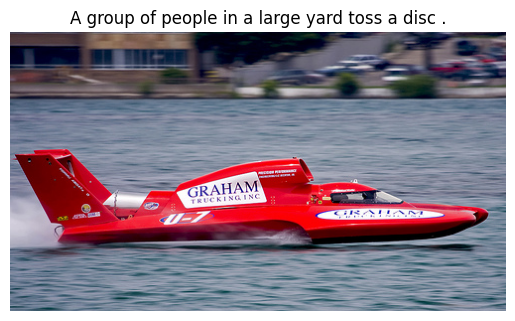

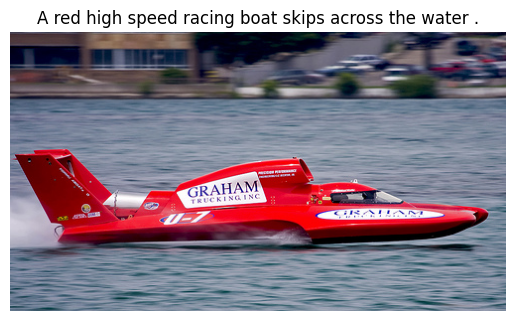

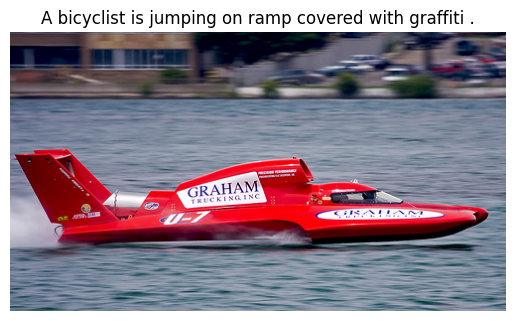

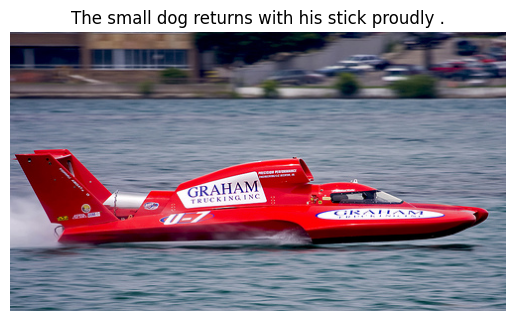

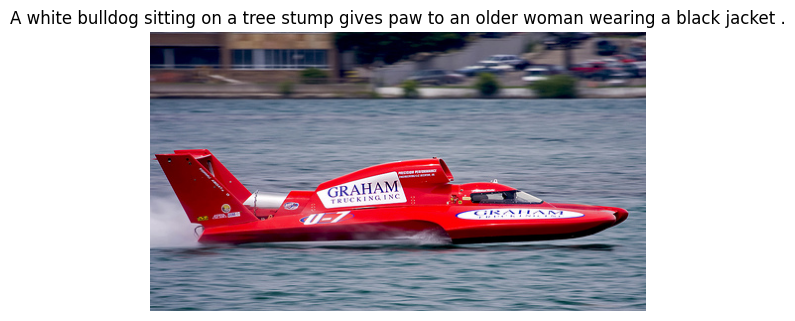

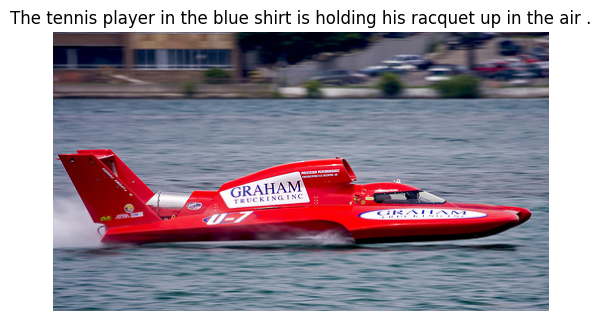

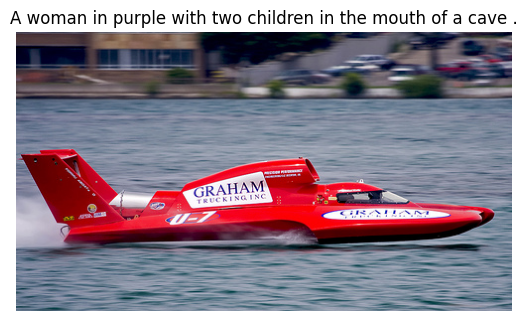

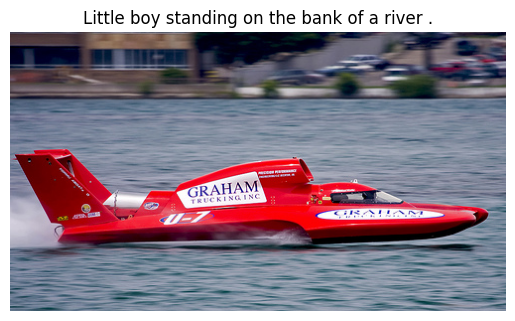

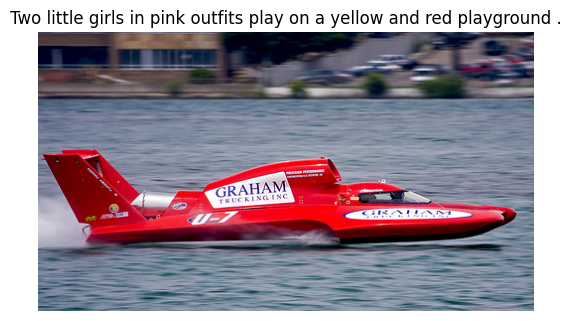

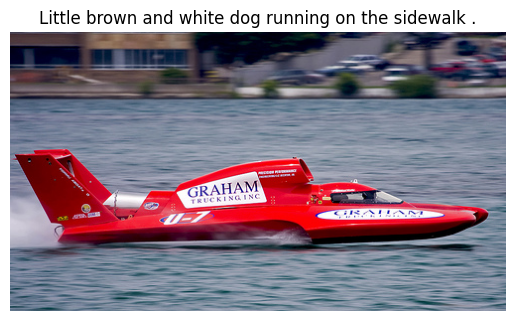

In [45]:
for combine in best_combine:
    description = combine[0]
    image_path = combine[1]

    image = Image.open(TEST_IMG_PATH + '/' + image_path)
    fig, ax = plt.subplots()

    ax.imshow(image)
    ax.axis('off')

    ax.set_title(description, fontsize=12)

    plt.show()

Как ожидалось, модель переобучена. Воспользуемся предобученной моделью от OpenAI CLIP.

In [46]:
del df_images, df_queries
df_queries = pd.read_csv(Path(PATH, 'test_queries.csv'), index_col = [0], sep = '|')
df_images = pd.read_csv(Path(PATH, 'test_images.csv'), sep = '|')

In [47]:
model = SentenceTransformer('clip-ViT-B-32')

In [48]:
img_emb = model.encode([Image.open(TEST_IMG_PATH + '/' + filepath) for filepath in df_images['image'].values], batch_size=128, convert_to_tensor=True, show_progress_bar=True)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

In [49]:
def search(query, k=3):
    for word in query.split():
        if word in BLOCK:
            return 'This query is unavailable in your country in compliance with local laws'
    query_emb = model.encode([query], convert_to_tensor=True, show_progress_bar=False)
    hits = util.semantic_search(query_emb, img_emb, top_k=k)[0]

    print("Query:")
    display(query)
    for hit in hits:
        display(IPImage(os.path.join(TEST_IMG_PATH, df_images['image'].values[hit['corpus_id']]), width=200))

Query:


'Cute dogs'

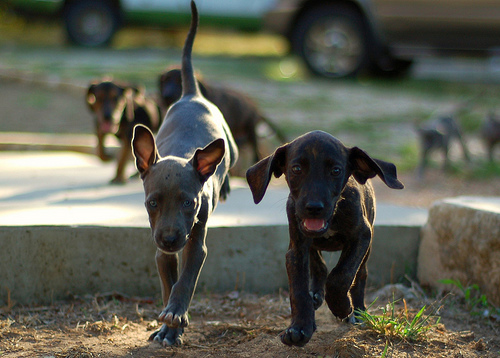

In [50]:
query = 'Cute dogs'
search(query, k = 1)

Модель нашла изображение по кастомному описанию.

Query:


'The man is dressed in black and smiling while another man is drinking and an elderly woman is standing near a fence .'

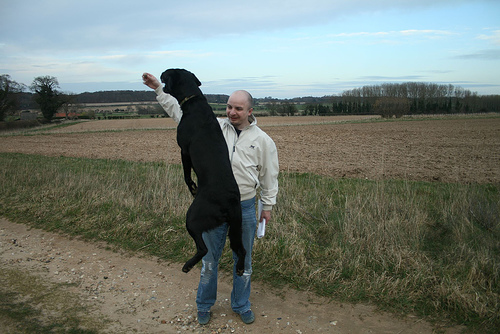

Query:


'A man on an orange bike .'

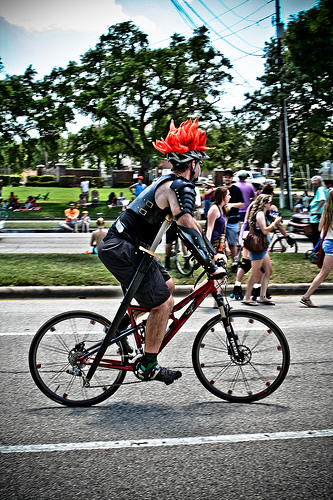

Query:


'A tennis player in a blue shirt celebrates his match .'

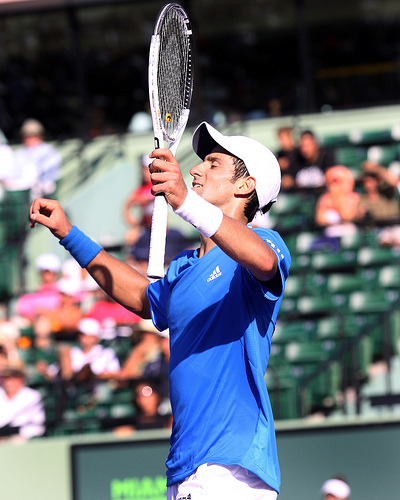

Query:


'A red high speed racing boat skips across the water .'

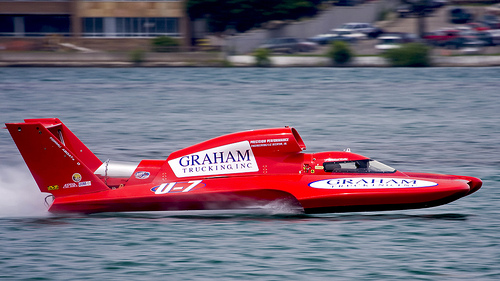

Query:


'A snowboarder in a red jacket slides down a snowy mountain .'

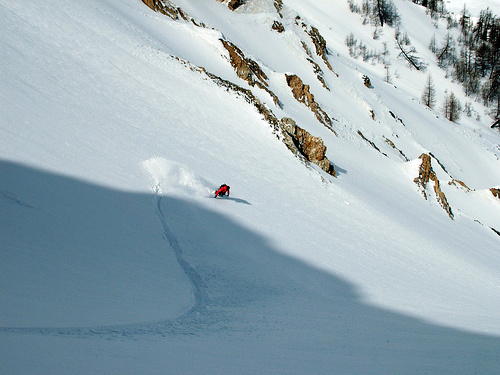

Query:


'A large crowd of girls are all wearing green skirts and white tank tops .'

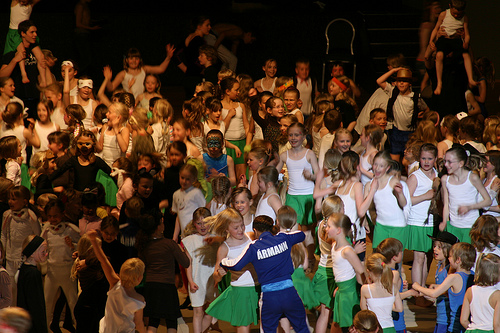

Query:


'An Asian woman is taking a photograph outside a white columned building .'

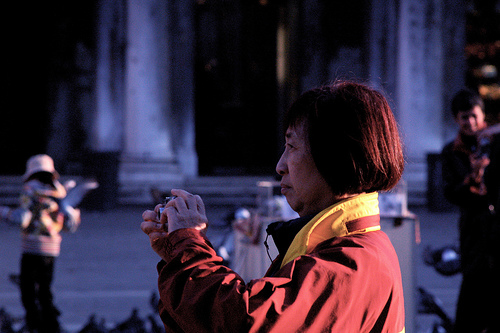

Query:


'A woman wearing a red coat begins to take a picture .'

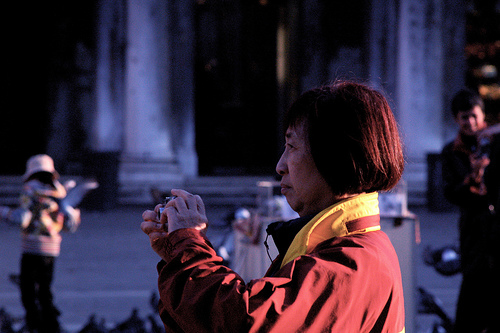

In [51]:
for index, query in df_queries.sample(n=10, random_state = 123).iterrows():
    search(query.query_text, k = 1)

Модель идеально нашла фото к каждому описанию.

## 8. Выводы

- Jupyter Notebook открыт
- Весь код выполняется без ошибок
- Ячейки с кодом расположены в порядке исполнения
- Исследовательский анализ данных выполнен
- Проверены экспертные оценки и краудсорсинговые оценки
- Из датасета исключены те объекты, которые выходят за рамки юридических ограничений
- Изображения векторизованы
- Текстовые запросы векторизованы
- Данные корректно разбиты на тренировочную и тестовую выборки
- Предложена метрика качества работы модели
- Предложена модель схожести изображений и текстового запроса
- Модель обучена
- По итогам обучения модели сделаны выводы
- Проведено тестирование работы модели
- По итогам тестирования визуально сравнили качество поиска

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Заключительный комментарий</b>

Подведем итоги. У тебя получилась очень необычная и интересная работа.
    
Я вижу что ты хорошо погрузился в тему проекта, придумал интересный подход с BLIP. И если ты еще и инференс сделаешь с использованием sklearn, а не sentence-transformers, то я спокоен - ты хорошо разобрался с деталями.   
    
    
Мои замечания по большей части касаются оформления, описаний, несоответствия описаний и кода. Хотя есть и более серьезные недоработки.
    
Что нужно доделать обязательно:
    
 - прошу тебя разделить EDA и предобработку
 - при соединени экспертных и краудсорс оценок не стоит использовать inner, слишком мало данных при этом остается.  уж лучше оставь только эспертные оценки
 - нужно исправить ошибку при чистке датасета от детских изображений
 - описать идею с BLIP, использовать корректное название колонки
 - код должен выполняться без ошибок
 - блок с тестированием нужно переписать, как именно я тебе расписал

    
Жду твою работу на повторное ревью.
</div>

<img src="http://s3.amazonaws.com/pix.iemoji.com/images/emoji/apple/ios-12/256/waving-hand.png" align=left width=44, heigth=44>
<div class="alert alert-info">
<b> Идеи и альтернативные подходы</b>
    
Оставлю тут, хотя мне кажется ты и так уже это знаешь ))
    
----    
    
  Если хочешь получить хорошо работающее решение без обучения, то можешь провести эксперимент с нейронной сетью CLIP от OPEN AI (это не обязательно, только если хочешь добиться хороших результатов в этом проекте).

  Про эту нейронку много где написано, но можешь посмотреть например вот здесь  https://habr.com/ru/post/539312/.

  А для написания  реализации наиболее удобной лично для меня оказалась библиотека sbert. https://www.sbert.net/examples/applications/image-search/README.html  
    
    
<hr>    
    
Также неплохо работает следующий подход без предобученных моделей (к тому же легко реализуемый).
    
    
Вместо того, чтобы подавать на вход модели изображение + текст и получать меру соответствия, поступаем по другому.
    
На вход модели подаем вектор описания, а на выходе учимся предсказывать вектор изображения.
    
По поводу метрик тут ситуация следующая. Точно работает следующий подход
    
  - берем метрику mse, но тогда нужно чтобы модель её уменьшала. А значит в обучении используем только пары заведомо сответствующие друг другу

Можно попробовать использовать косинусное расстояние, она позволяет использовать все данные (если есть соответствие то выдает 1, если нет то 0).
    
Также можно попробовать усложнить модель, например и изображения и тексты отправлять в пространство размерностью 256 и уже в этом пространстве учиться их "сближать".
    
По поводу методов векторизации: я бы использовать resnet18 для изображений (размерность эмбеддинга избражения 512) и БЕРТ для текстов (768).
    
***
    
А еще я видел удачный проект, где для векторизации изображений использовалось предсказание Resnet в котором не отключался последний слой. Получился вектор предсказаний верояятности что изображение принадлежит к каждому из 1000 классов Imagenet. И в сочетании с подходом "мешок слов" для текстов это может дать неплохой результа. Такая модель находит людей, собак, машины, снег и т.д.  
   
</div>